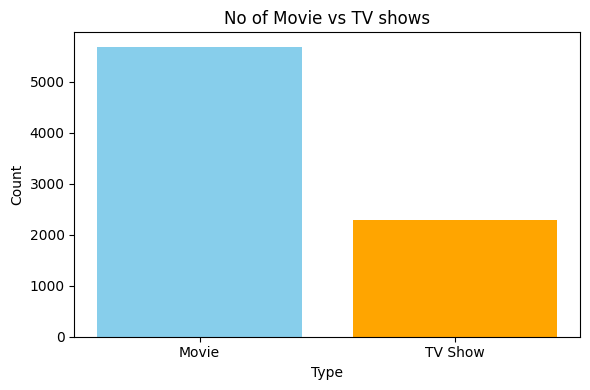

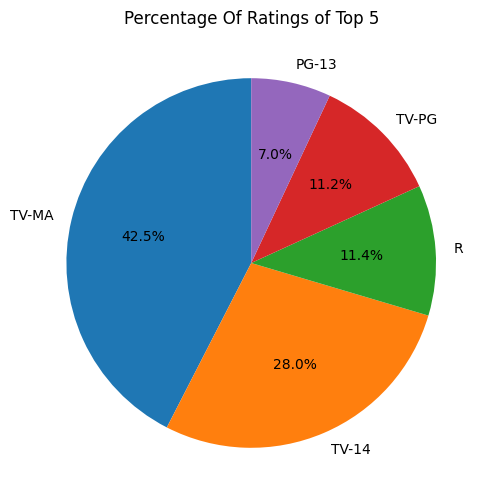

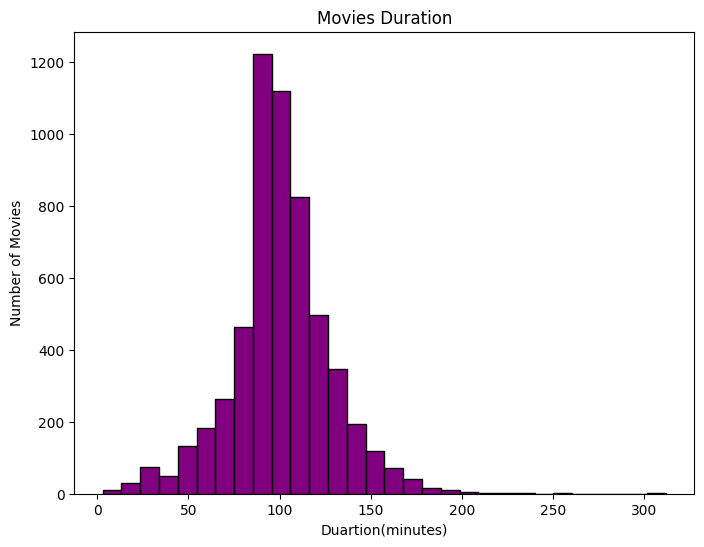

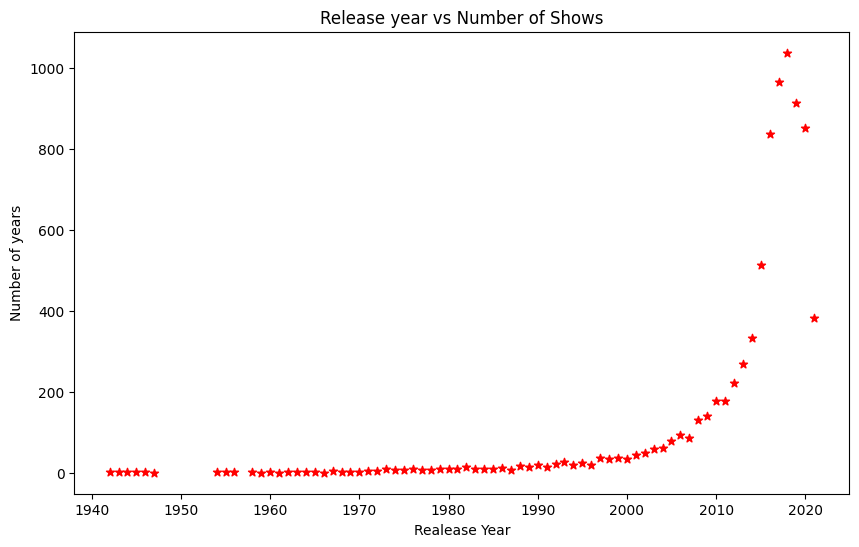

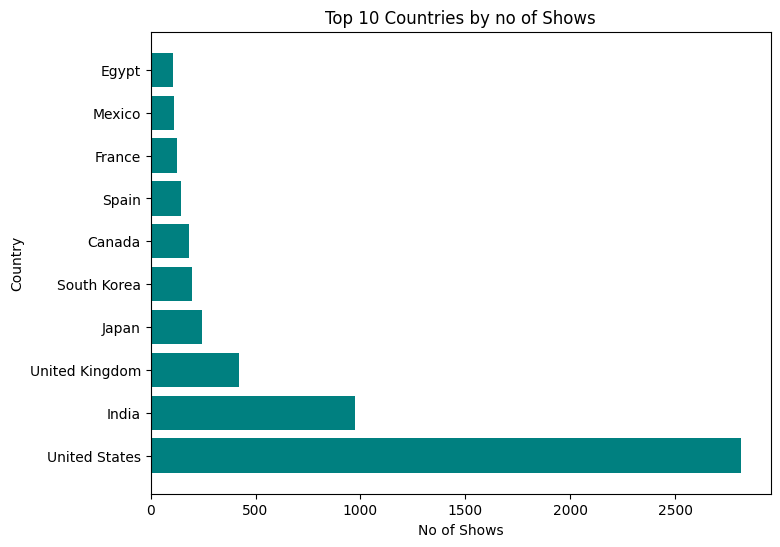

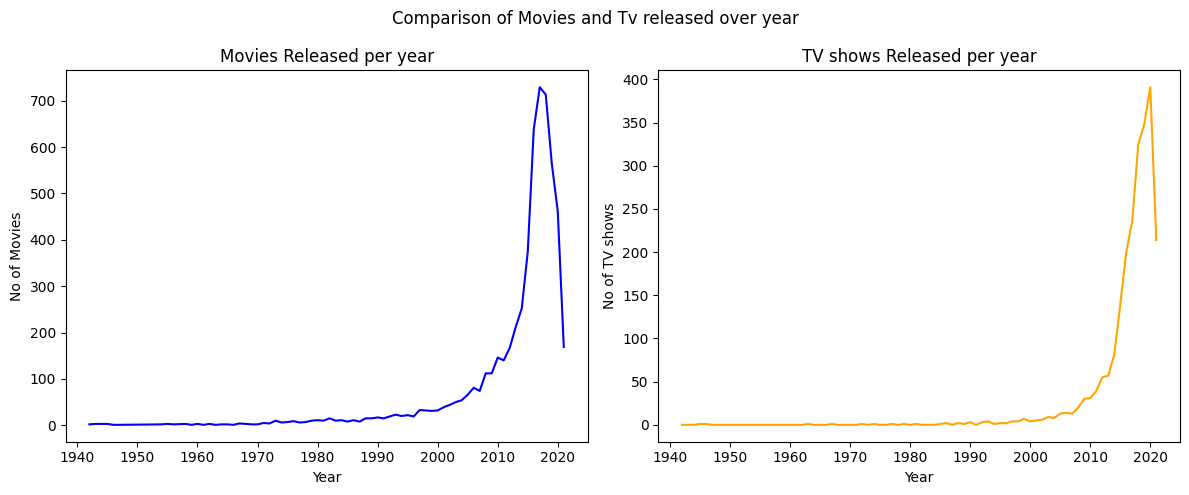

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")

df = df.dropna(subset=['type','release_year','rating','duration','country'])

type_count = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_count.index,type_count.values,color=["skyblue","orange"])
plt.title("No of Movie vs TV shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_vs_TvShows_graph.png",dpi=300)
plt.show()


rating_counts = df['rating'].value_counts().head(5)
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index,autopct="%1.1f%%",startangle=90)
plt.title("Percentage Of Ratings of Top 5")
plt.savefig("content_ratings_top_5.png",dpi=300)
plt.show()


movies_df = df[df["type"]=="Movie"].copy()
movies_df['duration_int'] = movies_df["duration"].str.replace('min',"").astype(int)

plt.figure(figsize=(8,6))
plt.hist(movies_df["duration_int"],bins=30,color="purple",edgecolor="black")
plt.title("Movies Duration")
plt.xlabel("Duartion(minutes)")
plt.ylabel("Number of Movies")
plt.savefig("Movie_duration_histogram.png",dpi=300)
plt.show()


release_year = df['release_year'].value_counts()
plt.figure(figsize=(10,6))
plt.scatter(release_year.index,release_year.values,color="red",marker="*")
plt.xlabel("Realease Year")
plt.ylabel("Number of years")
plt.title("Release year vs Number of Shows")
plt.savefig("release_year_vs_no_of_Shows.png",dpi=300)
plt.show()


country_counts = df["country"].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color="teal")
plt.xlabel("No of Shows")
plt.ylabel("Country")
plt.title("Top 10 Countries by no of Shows")
plt.savefig("top_10_countries_no_of_shows.png",dpi=300)
plt.show()

content_by_year = df.groupby(['release_year',"type"]).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2,figsize=(12,5))

#figure1 : subplot for No of Movies per year
ax[0].plot(content_by_year.index,content_by_year["Movie"],color="Blue")
ax[0].set_title("Movies Released per year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("No of Movies")

#figure2 : subplot for No of Tv Shows per year
ax[1].plot(content_by_year.index,content_by_year["TV Show"],color="orange")
ax[1].set_title("TV shows Released per year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("No of TV shows")


fig.suptitle("Comparison of Movies and Tv released over year")
plt.tight_layout()
plt.savefig("Comparison_movies_and_tvShows.png",dpi=300)